In [234]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import random as rd


In [235]:
rd.seed(45)

### 2d Datensatz, 100 Punkte

n_points = 1000
n_dims = 2


x_pos_mat = np.random.rand(n_points,n_dims)

In [236]:
x_pos_mat.shape

(1000, 2)

In [263]:
x_neg_mat = np.random.rand(n_points,2)


## shift
v = (.9,.9)

x_neg_mat+=v

In [264]:
(x_neg_mat.mean(),x_pos_mat.mean())

(1.394115508174558, 0.5003671959855769)

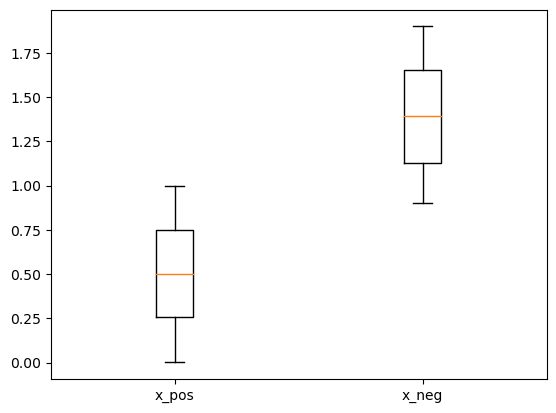

In [265]:
dic = {"x_pos":x_pos_mat.flat, "x_neg":x_neg_mat.flat}
fig, ax = plt.subplots()

ax.boxplot(dic.values())
ax.set_xticklabels(dic.keys())

plt.show()

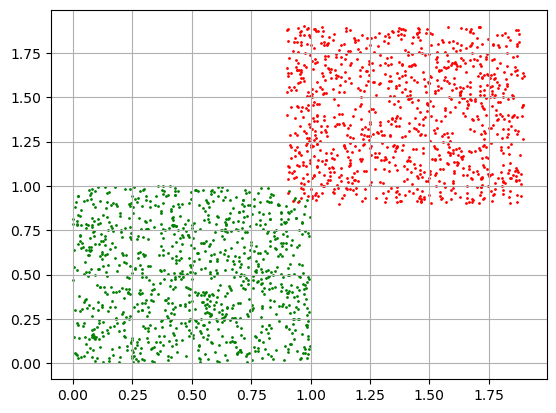

In [266]:
fig, ax = plt.subplots()

ax.scatter(x_pos_mat[:,0],x_pos_mat[:,1], c="green",s=1 )
ax.scatter(x_neg_mat[:,0],x_neg_mat[:,1], c="red",s=1)

plt.grid()
plt.show()

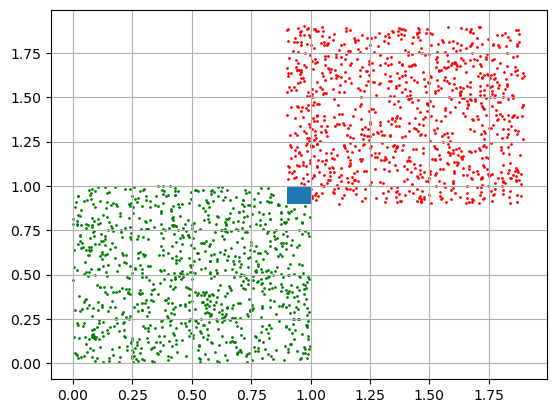

In [267]:

#overlapp bereich

fig, ax = plt.subplots()

ax.scatter(x_pos_mat[:,0],x_pos_mat[:,1], c="green",s=1 )
ax.scatter(x_neg_mat[:,0],x_neg_mat[:,1], c="red",s=1)
ax.add_patch(patches.Rectangle(v,1-v[0],1-v[1]))

plt.grid()
plt.show()

Was bedeutet der Begriff "Bayes Risiko": Der Bayes Risiko ist die Wahrscheinlichkeit das die (optimale?) Klassifikation fehlerhaft ist

Wie hoch ist der Bayes Fehler in unserem Fall, wenn beide Klassen a priori gleich wahrscheinlich sind?: Im bereich 0.9 < x,y < 1 ist die Wahrscheinlichkeit beider Klassen gleich groß entsprechend wäre der potentielle Fehler 50%, da beide Klassen uniform in diesem Bereich vorkommen. Für das gesamte datenset ist der Fehler aber nur 1%, da 99% der datenpunkte außerhalb des overlaps sind und somit sicher klassifiziert werden können.

Ppos x,y>0.9 * Pneg x,y<1 = 1/10 * 1/10 = 1%

Wie sieht die bestmögliche lineare Klassifikation aus und wie hoch wird das risiko sein?: Aufgrund des Overlaps kann es keine fehlerfreie lineare Klassifikation geben. Entsprechend würde eine diskriminante gleichförmig den Overlapp teilen und orthogonal zur Verbindungslinie der Zentren verlaufen

Wie kann man den erwarteten Testfehler minimieren?: Man müsste den Overlap vermeiden, dafür gibt es einen "Kernel Trick" welcher die DP in ein höherdimensionaleren Raum überführt um sie dort dann mittels Hyperebene linear zu trennen.

Wie groß ist die Wahrscheinlichkeit das beide DP Mengen nicht linear separabel sind?: 19%, da die Wahrscheinlichkeit das keine Punkte im möglichen Overlap bereich erscheinen ist 9/10 bei beiden Klassen, somit rechnen wir 1 - 9/10 * 9/10  = 19%

Tatsächlich separabel sind also: 81%

Wann ist lineare seperabilität gegeben?: Wenn beide Mengen kontradisjunkt sind, also keine overlaps existieren

Wahrscheinlichkeit das in einem 5d raum für keine lineare separabilität vorliegt: 1-9/10^10 =







In [268]:
from scipy.spatial import ConvexHull




In [269]:
hull_one = ConvexHull(x_pos_mat)
hull_two = ConvexHull(x_neg_mat)

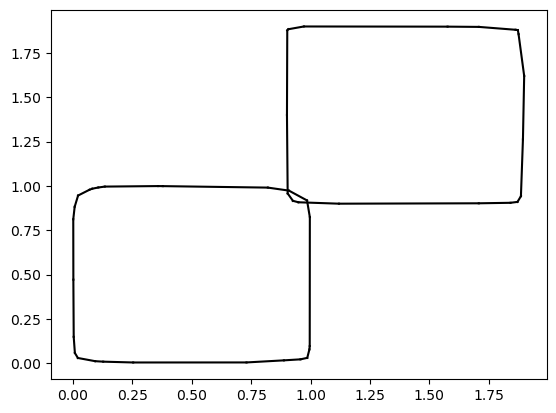

In [270]:
for simplex in hull_one.simplices:
    plt.plot(x_pos_mat[simplex, 0], x_pos_mat[simplex, 1], 'k-')

for simplex in hull_two.simplices:
    plt.plot(x_neg_mat[simplex, 0], x_neg_mat[simplex, 1], 'k-')



Idee um zu checken ob es ein Overlapp gibt: von jedem DP der teil der Konvexen Hülle ist einen Ray casten, wenn dieser 2 mal oder gar nicht mit dem anderem Polygon intersektiert, dann liegt der Punkt außerhalb des anderen Polygons, wenn er einmal intersektiert liegt er innerhalb des Polygons.
Implementation: ???????????????


Daher mit shapely gelöst:

In [248]:
from shapely.geometry import Polygon

poly1 = Polygon([*(x_pos_mat[hull_one.vertices])])
poly2 = Polygon([*(x_neg_mat[hull_two.vertices])])

poly1.intersects(poly2)

True

In [255]:
n_df = 1000
v_mut = 0.9

n_p = 100
n_d = 2

dataSets = [None] * n_df

for i in range(0,n_df):
    tmp_mat = np.random.rand(n_p,n_d)
    tmp_mat_mod = tmp_mat + v_mut
    dataSets[i] = (tmp_mat, tmp_mat_mod)





In [258]:
overlap_counter = 0

for i in range(0,n_df):


    hull_one = ConvexHull(dataSets[i][0])
    hull_two = ConvexHull(dataSets[i][1])


    poly1 = Polygon([*(dataSets[i][0][hull_one.vertices])])
    poly2 = Polygon([*(dataSets[i][1][hull_two.vertices])])

    is_Overlaping = poly1.intersects(poly2)

    if(is_Overlaping):
        overlap_counter+=1

print("Overlap rate: " , overlap_counter/n_df)

Overlaprate:  0.237


In [248]:
hull_one.simplices.shape

(12, 2)

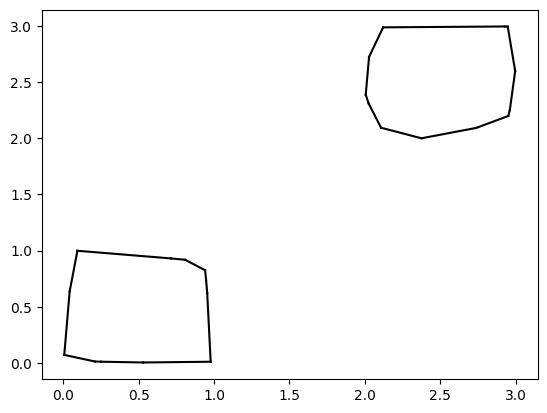

In [222]:
for simplex in hull_one.simplices:
    plt.plot(x_pos_mat[simplex, 0], x_pos_mat[simplex, 1], 'k-')

for simplex in hull_two.simplices:
    plt.plot(x_neg_mat[simplex, 0], x_neg_mat[simplex, 1], 'k-')

In [260]:
x_neg_mat[hull_two.simplices[0], 0]

array([2.10774997, 2.37550927])

In [252]:
points = np.array(hull_one.simplices.shape)

for simplex in points.size:
    points[i] =  x_neg_mat[hull_one.simplices[i], 0], x_neg_mat[hull_one.simplices[i], 1]

TypeError: 'int' object is not iterable

In [ ]:
from sympy import Point, Polygon

